In [1]:
import pandas_datareader.data as web
import quandl

from datetime import datetime as dt
import json

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Simple aggregations

In [2]:
# Get Walmart data
wmt = quandl.get('WIKI/WMT')

In [3]:
wmt.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1972-08-25,32.50,33.13,32.50,33.00,4900.0,0.0,1.0,0.043162,0.043999,0.043162,0.043826,2508800.0
1972-08-28,33.00,33.25,32.88,32.88,1900.0,0.0,1.0,0.043826,0.044158,0.043667,0.043667,972800.0
1972-08-29,32.75,32.75,32.50,32.50,3800.0,0.0,1.0,0.043494,0.043494,0.043162,0.043162,1945600.0
1972-08-30,32.50,32.50,32.25,32.50,800.0,0.0,1.0,0.043162,0.043162,0.042830,0.043162,409600.0
1972-08-31,32.25,32.25,32.00,32.00,1700.0,0.0,1.0,0.042830,0.042830,0.042498,0.042498,870400.0


In [6]:
# Resample
yearly = wmt.resample('A').mean()

[]

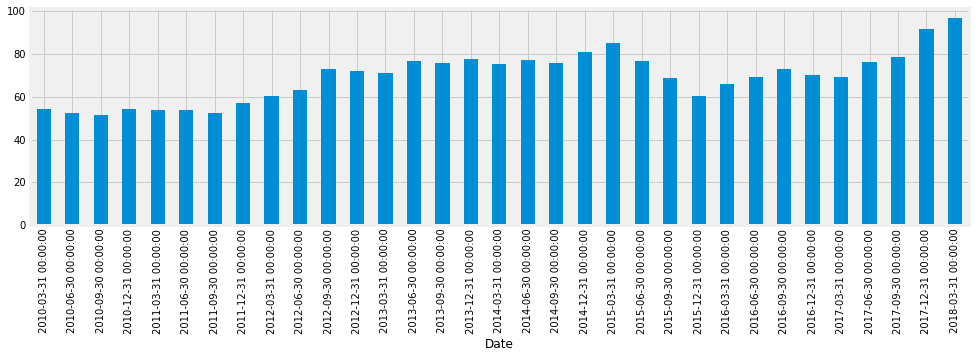

In [15]:
# Quick plotting
plt.figure(figsize = (15, 4))
wmt['2010':].Close.resample('Q').mean().plot(kind = 'bar')
plt.plot()

In [17]:
wmt.index.max()

Timestamp('2018-03-27 00:00:00')

# Rolling means

[]

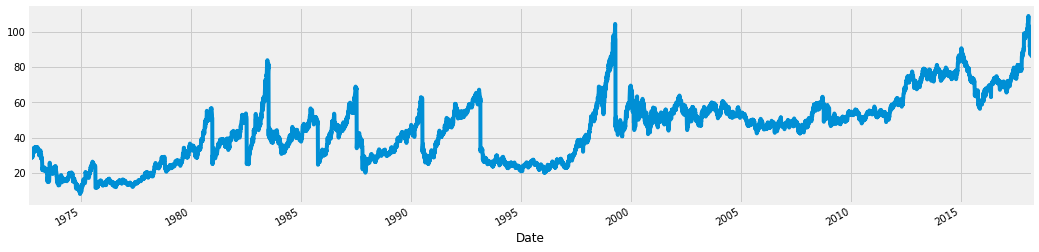

In [20]:
# Let's plot Open prices
wmt.Open.plot(figsize = (16, 4))
plt.plot()

In [23]:
# Get weekly rolling window
wmt.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1972-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-09-05,32.481429,32.625714,32.321429,32.447143,2100.000000,0.0,1.0,0.043137,0.043329,0.042925,0.043092,1.075200e+06
1972-09-06,32.445714,32.500000,32.285714,32.340000,1471.428571,0.0,1.0,0.043090,0.043162,0.042877,0.042949,7.533714e+05
1972-09-07,32.338571,32.357143,32.177143,32.231429,1528.571429,0.0,1.0,0.042948,0.042972,0.042733,0.042805,7.826286e+05


The first 6 rows are NaN, because they were aggregated into the mean at row 7.

[]

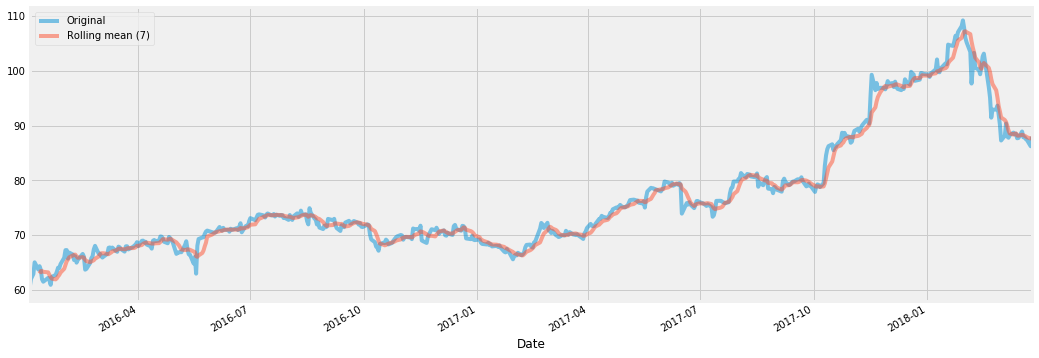

In [33]:
wmt['2016':].Open.plot(alpha = .5, label = 'Original')
wmt['2016':].Open.rolling(7).mean().plot(figsize = (16, 6), alpha = .5, label = 'Rolling mean (7)')
plt.legend()
plt.plot()

# Expanding


In expanding each value is an average of all values that came before.

[]

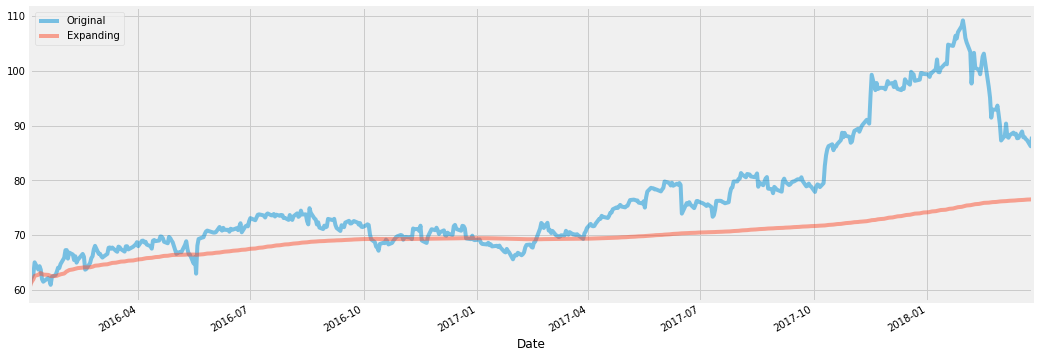

In [35]:
wmt['2016':].Open.plot(alpha = .5, label = 'Original')
wmt['2016':].Open.expanding().mean().plot(figsize = (16, 6), alpha = .5, label = 'Expanding')
plt.legend()
plt.plot()